# FEATURE SELECTION

# RETRIVAL THE IMPORTANT FEATURES,SELECTION AN IMPORTANT FEATURE IS VERY IMPORTANT
- Droping the constant features (Regression and classification)
- Information gain(classification)
- p-value(Regression)
- VIF (Regression)
- forward selection and backward selection (Regression and classification)
- correlation with target column(Regression and classification)

#  1)VARIANCE THRESHOLD METHOD

- Based on variance we can decide the data is constant or varying
- data is not varying much means,data has unique values'
- For example we have seen in loan data set,loan term:360
- python by default will use variance=0,it will drop those features which are having variance=0
- variance threshold is hyper parameter, we can keep threshold as any value
- based on internal team discussion
- we will drop those feature which are having <=threshold value

# 2)p-value

- h0:there is no relation x and y
- h1:there is relation X and Y
- p<0.05
   - reject the null hypothesis:which means include the variable
- p>0.05
   - Not reject the null hypothesis: which means donot include the variables
    

# 3)mutual info classify

- KNN and Entropy
- It will give the relation between input and output will pick which are having more relation
- input vs output
    - A.Entropy
    - B.KNN
    - C.R-square:explainability about y based on x
  

# 4) forward selection and backward selection


# forward selection method
- start with empty set of features
- iterate through each feature and select the one feature that improves model performance
- continue adding features one by one till we meet our criteria

# backward selection
- start with full set of features
- iterate through each feature by removing the feature which is having less impact on the model 
- continue the process , till your performance is stable


- both forward selection and backward selection methods are complex in nature
- more time will taken,will avoid in general

# 5)variance inflation factor(VIF)

- VIF will give the analysis of multicollinearity
- in VIF will find the R-Square value of each input feature wrt to other input feature
- will keep one feature as output and other feature are considered as input in regression equation
- THis will keep on iterate through all feature
- Every feature behave as input as well as output
- as we know every regression line gives Rsquare value from that value will fine VIF
- will drop the feature which are having VIF>5 or VIF>10 based on internal team discussion

# python code

In [1]:
import pandas as pd
dict1={'A':[100,200,300,400],
      "B":[1,2,3,4],
      "C":[10,20,30,40],
      "D":[10,10,10,10]}
df=pd.DataFrame(dict1)
df

,A,B,C,D
0,100,1,10,10
1,200,2,20,10
2,300,3,30,10
3,400,4,40,10


In [2]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import VarianceThreshold
vt=VarianceThreshold(threshold=0)
vt.fit(df)

VarianceThreshold(threshold=0)

In [25]:
vt.variances_

array([300.  ,   1.25,  30.  ,   0.  ])

In [26]:
vt.get_support()

array([ True,  True,  True, False])

In [27]:
vt.get_params()

{'threshold': 0}

In [28]:
vt.threshold

0

In [23]:
cols=vt.get_feature_names_out()
df[cols]

AttributeError: 'VarianceThreshold' object has no attribute 'get_feature_names_out'

In [2]:
import pandas as pd
import numpy as np
path=r"C:\Users\Lenovo\NARESHIT PYTHON\file handling files\winequality_red.csv"
df1=pd.read_csv(path)
print(df1)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               NaN               NaN          NaN             NaN        NaN   
1               7.4             0.700         0.00             1.9      0.076   
2               NaN               NaN          NaN             NaN        NaN   
3               7.8             0.880         0.00             2.6      0.098   
4               NaN               NaN          NaN             NaN        NaN   
...             ...               ...          ...             ...        ...   
3193            6.3             0.510         0.13             2.3      0.076   
3194            NaN               NaN          NaN             NaN        NaN   
3195            5.9             0.645         0.12             2.0      0.075   
3196            NaN               NaN          NaN             NaN        NaN   
3197            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [3]:
df1.dropna(inplace=True)
df1.reset_index(drop=True,inplace=True)
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [4]:
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


In [5]:
from sklearn.feature_selection import VarianceThreshold
vt=VarianceThreshold(threshold=0)
vt.fit(df1)

C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


VarianceThreshold(threshold=0)

In [6]:
vt.variances_

array([3.02952057e+00, 3.20423261e-02, 3.79237511e-02, 1.98665392e+00,
       2.21375732e-03, 7.10000000e+01, 2.83000000e+02, 3.55980179e-06,
       2.38202742e-02, 2.87146470e-02, 1.13493717e+00, 6.51760540e-01])

In [7]:
vt.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [8]:
vt.get_params()

{'threshold': 0}

In [9]:
cols=vt.get_feature_names_out()
vt[cols]

AttributeError: 'VarianceThreshold' object has no attribute 'get_feature_names_out'

# info gain-mutual info classify

In [10]:
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


In [11]:
X=df1.drop("quality",axis=1)
y=df1['quality']

In [12]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [13]:
y

0       5.0
1       5.0
2       5.0
3       6.0
4       5.0
       ... 
1594    5.0
1595    6.0
1596    6.0
1597    5.0
1598    6.0
Name: quality, Length: 1599, dtype: float64

In [14]:
from sklearn.feature_selection import mutual_info_classif
MI=mutual_info_classif(X,y)
MI

array([0.05589819, 0.10137598, 0.04520143, 0.01065481, 0.04541653,
       0.02882781, 0.06741476, 0.09449675, 0.01989409, 0.08245464,
       0.1755119 ])

In [15]:
d=pd.DataFrame(MI,
               columns=['Information gain'],
               index=X.columns)
d.sort_values("Information gain",ascending=False)

,Information gain
alcohol,0.175512
volatile acidity,0.101376
density,0.094497
sulphates,0.082455
total sulfur dioxide,0.067415
fixed acidity,0.055898
chlorides,0.045417
citric acid,0.045201
free sulfur dioxide,0.028828
pH,0.019894


<AxesSubplot:>

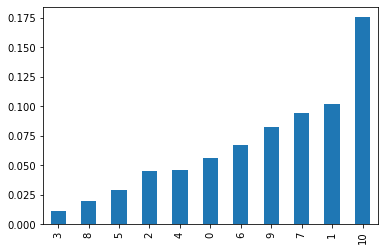

In [16]:
val=pd.Series(MI)
val.sort_values(ascending=True).plot(kind='bar')

# select k best

In [17]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif
import pandas as pd
data=pd.read_csv(path)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3193,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
3194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3195,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0
3196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
data.dropna(inplace=True)

In [19]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
3,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
5,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
7,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
9,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3189,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
3191,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
3193,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
3195,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


In [20]:
X=data.drop('quality',axis=1)
y=data['quality']
top_5=SelectKBest(mutual_info_classif,k=5)
val=top_5.fit(X,y)

In [21]:
val.get_support()

array([False,  True,  True, False, False, False, False,  True, False,
        True,  True])

In [22]:
val.get_support()

array([False,  True,  True, False, False, False, False,  True, False,
        True,  True])

# p-value

- we can develop linear regression model using two packages
- sklearn 
    - haves linear model
    - it gives intercept ,coeff,MSE,Rsqure etc
    - but it donot give the p-value
- stats
    - it have OLS method 
    - it gives intercept,coeff,Rsqure,p-value table
    - we can select important features using p-value analysis


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [24]:
path=r"C:\Users\Lenovo\NARESHIT PYTHON\file handling files\winequality_red.csv"
df2=pd.read_csv(path)
print(df2)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               NaN               NaN          NaN             NaN        NaN   
1               7.4             0.700         0.00             1.9      0.076   
2               NaN               NaN          NaN             NaN        NaN   
3               7.8             0.880         0.00             2.6      0.098   
4               NaN               NaN          NaN             NaN        NaN   
...             ...               ...          ...             ...        ...   
3193            6.3             0.510         0.13             2.3      0.076   
3194            NaN               NaN          NaN             NaN        NaN   
3195            5.9             0.645         0.12             2.0      0.075   
3196            NaN               NaN          NaN             NaN        NaN   
3197            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [25]:
df2.dropna(inplace=True)
df2.reset_index(drop=True,inplace=True)
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [26]:
X=df2.drop("quality",axis=1)
y=df2["quality"]

In [27]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [28]:
y

0       5.0
1       5.0
2       5.0
3       6.0
4       5.0
       ... 
1594    5.0
1595    6.0
1596    6.0
1597    5.0
1598    6.0
Name: quality, Length: 1599, dtype: float64

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1234,test_size=0.3)

In [31]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [32]:
y_predictions=LR.predict(X_test)
y_predictions

array([5.15272674, 5.32546327, 5.63662519, 5.51245819, 6.35588496,
       5.39028618, 5.37580837, 5.94379165, 5.49446987, 6.98211458,
       4.92847919, 5.18177228, 5.73271386, 5.56085417, 5.53985028,
       5.25272042, 4.93424659, 5.12423646, 6.27626835, 5.12589226,
       5.06691612, 5.91039778, 5.1797551 , 5.45854364, 5.72531378,
       6.31002431, 5.30913419, 5.50678991, 6.04808131, 5.47609822,
       4.72291628, 6.20818055, 5.21920961, 5.62421184, 5.55062526,
       5.52259916, 6.36735043, 5.23288886, 5.49938736, 5.80792898,
       5.16587916, 6.13318292, 5.72636822, 5.33537114, 5.63701918,
       4.96463531, 4.88029661, 5.78938553, 6.36333952, 5.56149953,
       4.95005899, 5.75085354, 6.67236186, 6.16951277, 5.34056761,
       5.12096361, 6.19641543, 5.21584694, 6.46449078, 5.25590493,
       5.27667097, 5.17871421, 5.09122333, 5.63083824, 5.01946398,
       6.16336001, 5.7427919 , 6.337122  , 5.28732968, 6.05063646,
       5.7342916 , 5.57340483, 5.21043842, 6.18633591, 5.50678

In [33]:
df1=pd.DataFrame()
df1=X_test
df1['y']=y
df1['y_pred']=y_predictions
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,y,y_pred
688,7.7,0.660,0.04,1.6,0.039,4.0,9.0,0.99620,3.40,0.47,9.4,5.0,5.152727
961,7.1,0.560,0.14,1.6,0.078,7.0,18.0,0.99592,3.27,0.62,9.3,5.0,5.325463
726,8.1,0.720,0.09,2.8,0.084,18.0,49.0,0.99940,3.43,0.72,11.1,6.0,5.636625
537,8.1,0.825,0.24,2.1,0.084,5.0,13.0,0.99720,3.37,0.77,10.7,6.0,5.512458
1544,8.4,0.370,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,7.0,6.355885
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,6.2,0.785,0.00,2.1,0.060,6.0,13.0,0.99664,3.59,0.61,10.0,4.0,5.163071
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6.0,5.556391
1045,6.9,0.440,0.00,1.4,0.070,32.0,38.0,0.99438,3.32,0.58,11.4,6.0,6.167418
1498,6.6,0.895,0.04,2.3,0.068,7.0,13.0,0.99582,3.53,0.58,10.8,6.0,5.271424


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
path=r"C:\Users\Lenovo\NARESHIT PYTHON\file handling files\winequality_red.csv"
df3=pd.read_csv(path)
print(df3)

In [ ]:
df3.dropna(inplace=True)
df3.reset_index(drop=True,inplace=True)
df3

In [ ]:
X=df3.drop('quality',axis=1)
y=df3["quality"]

In [ ]:
vif_data=pd.DataFrame()
vif_data["feature"]=X.columns
vif_data["VIF"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

# step11
# save the model

- once model is developed we need to save the model
- that model can use by any one
- model we can save in different format
    - pickle.pkl
    - joblib.joblib
    - save(deep learning)

In [34]:
import pickle
pickle.dump(LR,
           open('linear_wine_model.pkl','wb'))

# STEP12
# LOAD THE MODEL

In [37]:
model=pickle.load(open('linear_wine_model.pkl',"rb"))
model

LinearRegression()

# step13
# pass the data to get the predictions

# predictions

In [38]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,y,y_pred
688,7.7,0.660,0.04,1.6,0.039,4.0,9.0,0.99620,3.40,0.47,9.4,5.0,5.152727
961,7.1,0.560,0.14,1.6,0.078,7.0,18.0,0.99592,3.27,0.62,9.3,5.0,5.325463
726,8.1,0.720,0.09,2.8,0.084,18.0,49.0,0.99940,3.43,0.72,11.1,6.0,5.636625
537,8.1,0.825,0.24,2.1,0.084,5.0,13.0,0.99720,3.37,0.77,10.7,6.0,5.512458
1544,8.4,0.370,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,7.0,6.355885
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,6.2,0.785,0.00,2.1,0.060,6.0,13.0,0.99664,3.59,0.61,10.0,4.0,5.163071
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6.0,5.556391
1045,6.9,0.440,0.00,1.4,0.070,32.0,38.0,0.99438,3.32,0.58,11.4,6.0,6.167418
1498,6.6,0.895,0.04,2.3,0.068,7.0,13.0,0.99582,3.53,0.58,10.8,6.0,5.271424


In [41]:
model.predict(X_test)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 11 is different from 13)